Dataset shape: (569, 32)

First few rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst

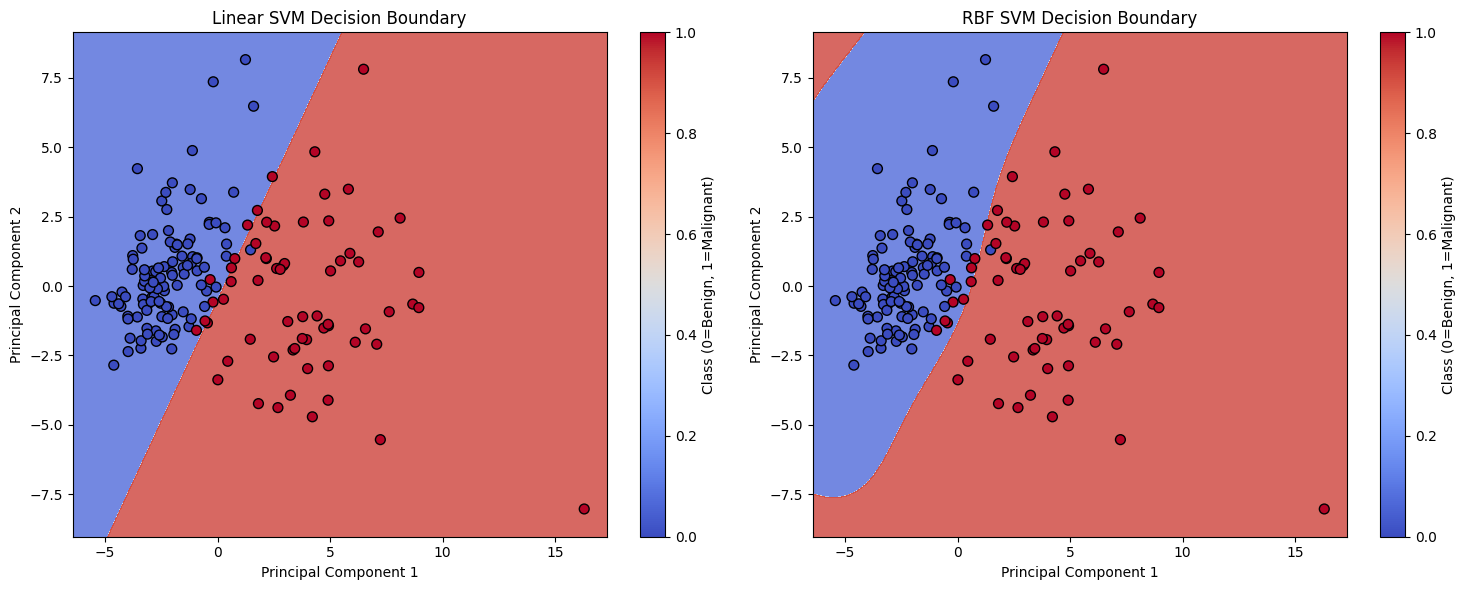


HYPERPARAMETER TUNING
Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.9698

Best SVM Test Accuracy: 0.9532

Classification Report for Best SVM:
              precision    recall  f1-score   support

      Benign       0.93      1.00      0.96       107
   Malignant       1.00      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171


CROSS-VALIDATION COMPARISON
Linear SVM:
  Cross-validation scores: [0.975      0.9875     0.975      0.94936709 0.93670886]
  Mean CV accuracy: 0.9647 (+/- 0.0374)

RBF SVM:
  Cross-validation scores: [0.9875     1.         0.9875     0.94936709 0.92405063]
  Mean CV accuracy: 0.9697 (+/- 0.0569)

Tuned RBF SVM:
  Cross-validation scores: [0.975      0.975      0.9875     0.97468354 0.93670886]
  Mean CV accuracy: 0.9698 (+/- 0.0345)



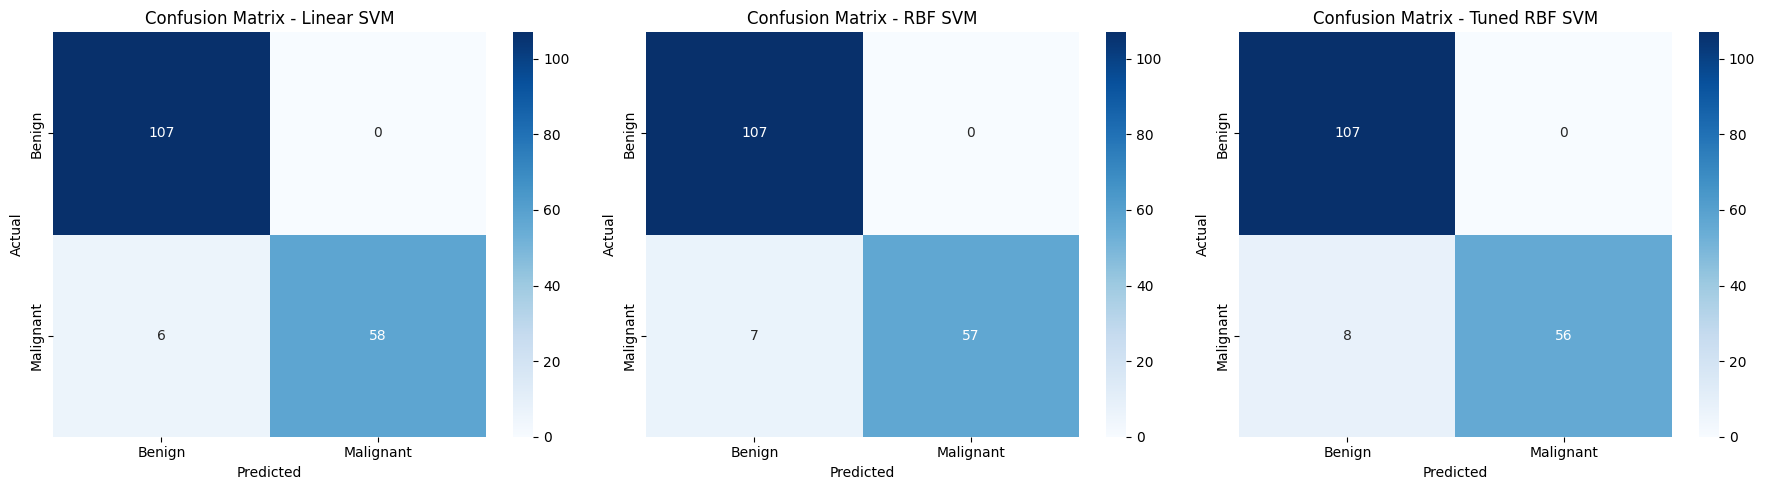

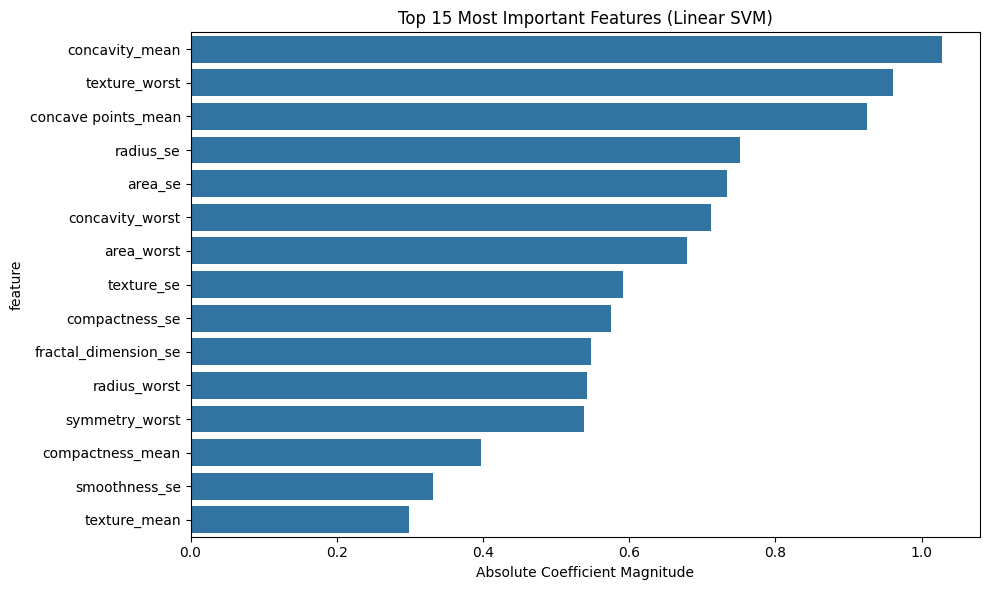


REGULARIZATION PARAMETER (C) ANALYSIS
C=0.001 : Train Accuracy=0.9422, Test Accuracy=0.9298
C=0.01  : Train Accuracy=0.9724, Test Accuracy=0.9532
C=0.1   : Train Accuracy=0.9824, Test Accuracy=0.9825
C=1     : Train Accuracy=0.9899, Test Accuracy=0.9649
C=10    : Train Accuracy=0.9925, Test Accuracy=0.9649
C=100   : Train Accuracy=1.0000, Test Accuracy=0.9415


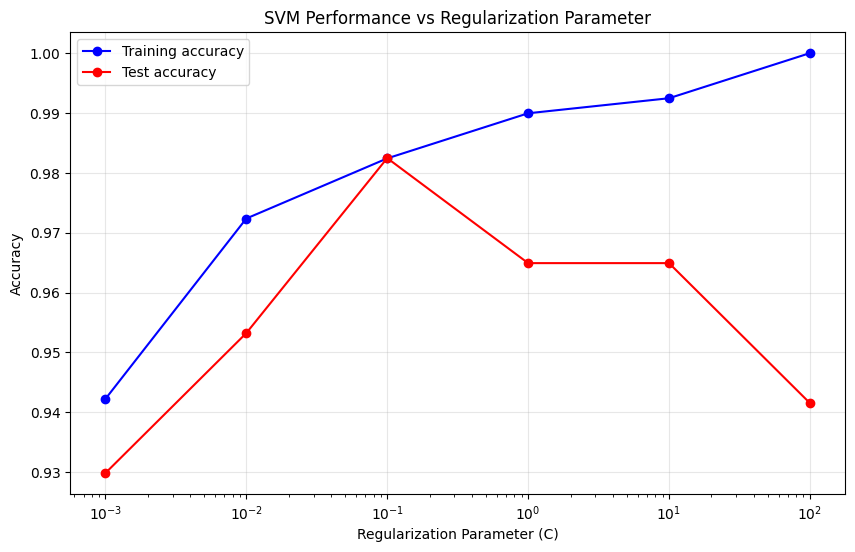


FINAL SUMMARY
Dataset: Breast Cancer Wisconsin
Total samples: 569
Features: 30
Benign cases: 357
Malignant cases: 212

Best model: Tuned RBF SVM
Best test accuracy: 0.9532


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# 1. Load and prepare the dataset
df = pd.read_csv('breast-cancer.csv')

# Explore the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nTarget distribution:")
print(df['diagnosis'].value_counts())

# Prepare features and target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Encode target variable (M=1, B=0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"\nTarget encoding: {list(le.classes_)} -> {list(le.transform(le.classes_))}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")

# 2. Train SVM with linear and RBF kernels
# Linear SVM
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_scaled, y_train)

# RBF SVM
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_svm.predict(X_test_scaled)
y_pred_rbf = rbf_svm.predict(X_test_scaled)

# Evaluate models
print("\n" + "="*50)
print("LINEAR SVM PERFORMANCE")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear, target_names=['Benign', 'Malignant']))

print("\n" + "="*50)
print("RBF SVM PERFORMANCE")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf, target_names=['Benign', 'Malignant']))

# 3. Visualize decision boundary using 2D data (PCA for dimensionality reduction)
def plot_decision_boundary_2d(X, y, model, title, ax):
    """Plot decision boundary for 2D data"""
    # Create a mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
    
    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and margins
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', 
                       marker='o', s=50, cmap=plt.cm.coolwarm)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)
    
    return scatter

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nExplained variance ratio by PCA components: {pca.explained_variance_ratio_}")

# Train SVMs on 2D data for visualization
linear_svm_2d = SVC(kernel='linear', random_state=42)
linear_svm_2d.fit(X_train_pca, y_train)

rbf_svm_2d = SVC(kernel='rbf', random_state=42)
rbf_svm_2d.fit(X_train_pca, y_train)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

scatter1 = plot_decision_boundary_2d(X_test_pca, y_test, linear_svm_2d, 
                                   'Linear SVM Decision Boundary', ax1)
scatter2 = plot_decision_boundary_2d(X_test_pca, y_test, rbf_svm_2d, 
                                   'RBF SVM Decision Boundary', ax2)

# Add colorbar
plt.colorbar(scatter1, ax=ax1, label='Class (0=Benign, 1=Malignant)')
plt.colorbar(scatter2, ax=ax2, label='Class (0=Benign, 1=Malignant)')

plt.tight_layout()
plt.show()

# 4. Hyperparameter tuning with GridSearchCV
print("\n" + "="*50)
print("HYPERPARAMETER TUNING")
print("="*50)

# Define parameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Perform grid search
grid_search = GridSearchCV(SVC(random_state=42), param_grid, 
                         cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Train with best parameters
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

print(f"\nBest SVM Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report for Best SVM:")
print(classification_report(y_test, y_pred_best, target_names=['Benign', 'Malignant']))

# 5. Cross-validation performance comparison
print("\n" + "="*50)
print("CROSS-VALIDATION COMPARISON")
print("="*50)

models = {
    'Linear SVM': SVC(kernel='linear', random_state=42),
    'RBF SVM': SVC(kernel='rbf', random_state=42),
    'Tuned RBF SVM': best_svm
}

for name, model in models.items():
    if name == 'Tuned RBF SVM':
        # Already tuned, just use the model
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    print(f"{name}:")
    print(f"  Cross-validation scores: {cv_scores}")
    print(f"  Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print()

# 6. Confusion matrix visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, y_pred) in enumerate([
    ('Linear SVM', y_pred_linear),
    ('RBF SVM', y_pred_rbf),
    ('Tuned RBF SVM', y_pred_best)
]):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    axes[idx].set_title(f'Confusion Matrix - {name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 7. Feature importance analysis (for linear SVM)
if hasattr(linear_svm, 'coef_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(linear_svm.coef_[0])
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title('Top 15 Most Important Features (Linear SVM)')
    plt.xlabel('Absolute Coefficient Magnitude')
    plt.tight_layout()
    plt.show()

# 8. Compare with different C values (regularization parameter)
print("\n" + "="*50)
print("REGULARIZATION PARAMETER (C) ANALYSIS")
print("="*50)

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for C in C_values:
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train_scaled, y_train)
    
    train_score = svm.score(X_train_scaled, y_train)
    test_score = svm.score(X_test_scaled, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"C={C:<6}: Train Accuracy={train_score:.4f}, Test Accuracy={test_score:.4f}")

# Plot C vs accuracy
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, 'bo-', label='Training accuracy')
plt.semilogx(C_values, test_scores, 'ro-', label='Test accuracy')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('SVM Performance vs Regularization Parameter')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Final summary
print("\n" + "="*50)
print("FINAL SUMMARY")
print("="*50)
print(f"Dataset: Breast Cancer Wisconsin")
print(f"Total samples: {len(df)}")
print(f"Features: {X.shape[1]}")
print(f"Benign cases: {sum(y_encoded == 0)}")
print(f"Malignant cases: {sum(y_encoded == 1)}")
print(f"\nBest model: Tuned RBF SVM")
print(f"Best test accuracy: {accuracy_score(y_test, y_pred_best):.4f}")